<a href="https://colab.research.google.com/github/Joe-hyper/DSW4C/blob/main/Python_Notebook_IP_Week_4_Core_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Defining the question.**

### a) Specifying the question
        Find out whether the averages of blue cars hired on weekends is equal to the averages of bluecars hired on weekdays.

### b) Defining the metric for success

        Proving how accurate the original claim is.

### c) Understanding the context
        Just like before, we have been tasked to understand electric car usage by solving for another research question. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

        In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”. The selected periods of interest be either weekdays or weekends but not a mix of both. You can also consider postal codes 75015 vs 75017 to some of the areas of interest. 

### d) Recording the experimental design

        a)Find and deal with outliers, anomalies, and missing data within the dataset.
        b)Plot appropriate univariate and bivariate summaries recording our    observations.
        c)Implement the solution by performing hypothesis testing.
        d)This will need to be documented when writing the report. 

### e) Data Relevance

# **2. Importing Libraries.**

In [1]:
# importing all libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn as sk
from scipy import stats
import os
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import warnings
warnings.filterwarnings('ignore')

# **3. Loading the Data.**

In [2]:
# loading the dataset
# dataset url = http://bit.ly/DSCoreAutolibDataset
autolib = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
autolib

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


# **4. Data Understanding.**

In [3]:
# shape of data
print(f'The dataset has {autolib.shape[0]} records, and {autolib.shape[1]} columns.')

The dataset has 16085 records, and 13 columns.


In [4]:
# lets check the info of the dataset
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [5]:
# finding out the data types in our column
autolib.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [6]:
# preview of the top records of the dataset
autolib.head(3)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27


In [7]:
# a preview of the bottom records of our dataset
autolib.tail(3) 

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


# **5. Data Preparation.**

a) Validity

In [8]:
# lets drop any unnecessary columns that are not needed for this experiment
newautolib = autolib.drop(columns=['n_daily_data_points', 'dayOfWeek','Utilib_taken_sum','Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum','Slots_freed_sum', 'Slots_taken_sum' ] , inplace= True, axis = 1)

b) Completeness

In [9]:
# checking for missing values
autolib.isnull().sum()

Postal code              0
date                     0
day_type                 0
BlueCars_taken_sum       0
BlueCars_returned_sum    0
dtype: int64

There are no null values in our columns. This is good!

c) Consistency

In [10]:
# lets check for any duplicate values
autolib.duplicated().any().any()

False

d) Uniformity

In [11]:
#Ensure uniformity by changing the column names to lower case, stripping of the whitespaces,removing periods, 
#this ensures good readerbility plus every possible naming issue is covered.
#This is to be applied to the bitcoin, tether and ethereum datasets.

autolib.columns = autolib.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('.', '')
autolib

,postal_code,date,day_type,bluecars_taken_sum,bluecars_returned_sum
0,75001,1/1/2018,weekday,110,103
1,75001,1/2/2018,weekday,98,94
2,75001,1/3/2018,weekday,138,139
3,75001,1/4/2018,weekday,104,104
4,75001,1/5/2018,weekday,114,117
...,...,...,...,...,...
16080,95880,6/15/2018,weekday,15,10
16081,95880,6/16/2018,weekend,19,19
16082,95880,6/17/2018,weekend,33,35
16083,95880,6/18/2018,weekday,11,14


In [12]:
#Converting datatypes
autolib['date']= pd.to_datetime(autolib['date']) 
autolib.head()

,postal_code,date,day_type,bluecars_taken_sum,bluecars_returned_sum
0,75001,2018-01-01,weekday,110,103
1,75001,2018-01-02,weekday,98,94
2,75001,2018-01-03,weekday,138,139
3,75001,2018-01-04,weekday,104,104
4,75001,2018-01-05,weekday,114,117


e) Dealing with outliers

In [13]:
# Selecting continuous columns only.
numerical = list(autolib.select_dtypes(exclude=['object']).columns)
numerical

['postal_code', 'date', 'bluecars_taken_sum', 'bluecars_returned_sum']

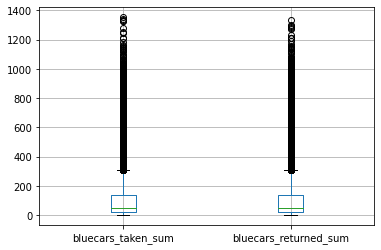

In [14]:
# Checking for outliers in our blue cars taken and blue cars returned.
boxplot = autolib.boxplot(column=['bluecars_taken_sum', 'bluecars_returned_sum'])

In [15]:
# New dataset
autolib_cleaned = autolib.copy()

In [16]:
# lets remove outliers in the bluecars taken
max_threshold = autolib['bluecars_taken_sum'].quantile(0.85)
print(max_threshold)
min_threshold = autolib['bluecars_taken_sum'].quantile(0.15)
print(min_threshold)
autolib2 = autolib[autolib['bluecars_taken_sum']<= max_threshold]
autolib2 = autolib[autolib['bluecars_taken_sum']> min_threshold]
print(autolib2.shape)


284.0
12.0
(13621, 5)


In [17]:
# removing outliers in the bluecars returned.
max_thresh1 = autolib2['bluecars_returned_sum'].quantile(0.85)
print(max_thresh1)
min_thresh1 = autolib2['bluecars_returned_sum'].quantile(0.15)
print(min_thresh1)
autolib3 = autolib2[autolib2['bluecars_returned_sum']<= max_thresh1]
autolib3 = autolib2[autolib2['bluecars_returned_sum']> min_thresh1]
print(autolib3.shape)


331.0
22.0
(11563, 5)


# **6. Analysis**

a) Summary statistics

In [18]:
autolib3.describe()

,postal_code,bluecars_taken_sum,bluecars_returned_sum
count,11563.000000,11563.000000,11563.000000
mean,87621.476606,170.476260,170.492087
std,8189.737479,201.873149,201.954134
min,75001.000000,13.000000,23.000000
25%,75019.000000,41.000000,40.000000
50%,92250.000000,79.000000,78.000000
75%,93260.000000,227.000000,224.000000
max,95880.000000,1352.000000,1332.000000


### **b) Univariate Analysis**

### i) Categorical Columns

In [19]:
# lets get a list of our categorical columns
categorical = list(autolib3.select_dtypes(include = ['object']).columns)
categorical

['day_type']

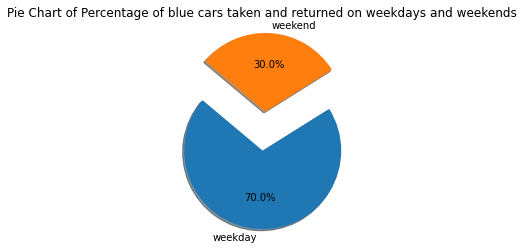

In [20]:
# lets visualize via a pie chart the ratio of weekends to weekdays in our data
plt.pie(autolib3['day_type'].value_counts(normalize=True), labels =autolib3['day_type'].value_counts().index, autopct = '%1.1f%%', shadow = True,explode=(0.5,0), startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of Percentage of blue cars taken and returned on weekdays and weekends')
plt.show()

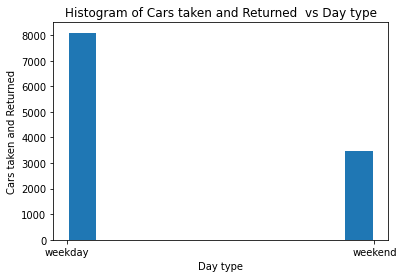

In [21]:
# histogram
weekday_points = autolib3['day_type']

plt.hist(weekday_points, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Day type')
plt.ylabel('Cars taken and Returned')
plt.title('Histogram of Cars taken and Returned  vs Day type')
plt.show()



In [22]:
# In our assesment we are advised that The selected periods of interest be either weekdays or weekends but not a mix of both. hence we sample weekends and weekdays
#Weekend
autolibWe = autolib3[autolib3['day_type'] == 'weekend']
autolibWe.reset_index(drop=True, inplace= True)
autolibWe.tail(3)

,postal_code,date,day_type,bluecars_taken_sum,bluecars_returned_sum
3463,95880,2018-06-03,weekend,36,33
3464,95880,2018-06-10,weekend,34,32
3465,95880,2018-06-17,weekend,33,35


In [23]:
# Weekday
autolibWd = autolib3[autolib3['day_type'] == 'weekday']
autolibWd.reset_index(drop=True, inplace= True)
autolibWd.tail(3)

,postal_code,date,day_type,bluecars_taken_sum,bluecars_returned_sum
8094,95880,2018-05-08,weekday,31,32
8095,95880,2018-05-21,weekday,26,27
8096,95880,2018-06-12,weekday,25,25


**Measures of central tendency**

In [24]:
# weekends
print('Measures of central tendency for weekends: ')
df= autolibWe[['bluecars_returned_sum', 'bluecars_taken_sum']]
print('Mean is: ')
print(df.mean())
print('Mode is: ')
print(df.mode())
print('Median is: ')
print(df.median())

Measures of central tendency for weekends: 
Mean is: 
bluecars_returned_sum    195.390364
bluecars_taken_sum       193.922966
dtype: float64
Mode is: 
   bluecars_returned_sum  bluecars_taken_sum
0                     24                  32
Median is: 
bluecars_returned_sum    87.0
bluecars_taken_sum       87.0
dtype: float64


In [25]:
# max value of cars used and returned
df.max()

bluecars_returned_sum    1332
bluecars_taken_sum       1352
dtype: int64

In [26]:
# min value of cars used and returned
df.min()

bluecars_returned_sum    23
bluecars_taken_sum       13
dtype: int64

In [27]:
# quantiles
df.quantile([0.25, 0.5, 0.75])


,bluecars_returned_sum,bluecars_taken_sum
0.25,46.0,47.00
0.50,87.0,87.00
0.75,252.0,248.75


In [28]:
# Weekday

print('Measures of central tendency for weekdays: ')
df2= autolibWd[['bluecars_returned_sum', 'bluecars_taken_sum']]
print('Mean is: ')
print(df2.mean())
print('Mode is: ')
print(df2.mode())
print('Median is: ')
print(df2.median())

Measures of central tendency for weekdays: 
Mean is: 
bluecars_returned_sum    159.834136
bluecars_taken_sum       160.439669
dtype: float64
Mode is: 
   bluecars_returned_sum  bluecars_taken_sum
0                     23                  29
Median is: 
bluecars_returned_sum    74.0
bluecars_taken_sum       74.0
dtype: float64


In [29]:
# max value of cars used and returned
df2.max()

bluecars_returned_sum    1056
bluecars_taken_sum       1093
dtype: int64

In [30]:
# quantiles
df2.quantile([0.25, 0.5, 0.75])

,bluecars_returned_sum,bluecars_taken_sum
0.25,39.0,39.0
0.50,74.0,74.0
0.75,217.0,219.0


### ii)Numerical columns

Measures of central tendency

In [31]:
# lets get a list of our numerical columns
numerical = list(autolib3.select_dtypes(include = ['integer']).columns)
numerical

['postal_code', 'bluecars_taken_sum', 'bluecars_returned_sum']

In [32]:
# Function that determines the measures of central tendency.
def MeasureCentral(measure, columns, autolib3):
  for column in columns:
    if measure == 'mean':
      print(f"{column} column mean = {autolib3[column].mean()}")
    elif measure == 'median':
      print(f"{column} column median = {autolib3[column].median()}")
    elif measure == 'mode':
      print(f"{column} column mode = {autolib3[column].mode()}")

In [33]:
# Mean
MeasureCentral('mean', numerical, autolib3)

postal_code column mean = 87621.47660641703
bluecars_taken_sum column mean = 170.47626048603303
bluecars_returned_sum column mean = 170.49208682867769


In [34]:
# Median
MeasureCentral('median', numerical, autolib3)

postal_code column median = 92250.0
bluecars_taken_sum column median = 79.0
bluecars_returned_sum column median = 78.0


In [35]:
# Mode
MeasureCentral('mode', numerical, autolib3)

postal_code column mode = 0     75010
1     75011
2     75012
3     75013
4     75014
5     75015
6     75016
7     75017
8     75018
9     75019
10    75020
11    92100
dtype: int64
bluecars_taken_sum column mode = 0    28
dtype: int64
bluecars_returned_sum column mode = 0    23
dtype: int64


**Measures of dispersion**

In [36]:
# Function used to determine the measures of distribution.
def MeasureDistribution(measure, columns, autolib3):
  for column in columns:
    if measure == 'range':
      print(f"{column} column range = {autolib3[column].max() - autolib3[column].min()}")
    elif measure == 'IQR':
      Q1 = autolib3[column].quantile(0.25)
      Q3 = autolib3[column].quantile(0.75)
      IQR = Q3 - Q1
      print(f"{column} column IQR = {IQR}")
    elif measure == 'var':
      print(f"{column} column variance = {autolib3[column].var()}")
    elif measure == 'std':
      print(f"{column} column std = {autolib3[column].std()}")
    elif measure == 'skew':
      print(f"{column} column skew = {autolib3[column].skew()}")
    elif measure == 'kurt':
      print(f"{column} column kurt = {autolib3[column].kurt()}")

In [37]:
# Range
MeasureDistribution('range', numerical, autolib3)

postal_code column range = 20879
bluecars_taken_sum column range = 1339
bluecars_returned_sum column range = 1309


In [38]:
# IQR
MeasureDistribution('IQR', numerical, autolib3)

postal_code column IQR = 18241.0
bluecars_taken_sum column IQR = 186.0
bluecars_returned_sum column IQR = 184.0


In [39]:
# Variance
MeasureDistribution('var', numerical, autolib3)

postal_code column variance = 67071799.97114829
bluecars_taken_sum column variance = 40752.768399368804
bluecars_returned_sum column variance = 40785.47241186274


In [40]:
# Standard Deviation
MeasureDistribution('std', numerical, autolib3)

postal_code column std = 8189.737478768675
bluecars_taken_sum column std = 201.87314927787895
bluecars_returned_sum column std = 201.95413442626705


In [41]:
# Kurtosis
MeasureDistribution('kurt', numerical, autolib3)

postal_code column kurt = -1.2630520181837537
bluecars_taken_sum column kurt = 3.9895705163543753
bluecars_returned_sum column kurt = 3.997382265295752


**Histograms**

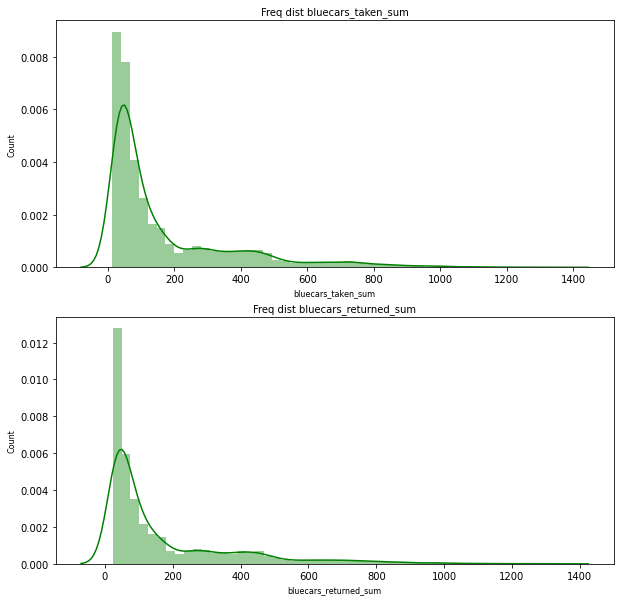

In [42]:
# Age and Household size column histograms
fig,ax  = plt.subplots(len(numerical[1:]), figsize = (10,10))
for i,col_name in enumerate(numerical[1:]):
    sns.distplot(autolib3[col_name], hist=True, ax=ax[i], color = 'green')
    ax[i].set_title('Freq dist '+ col_name, fontsize=10)
    ax[i].set_xlabel(col_name, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

### c) Bivariate Analysis

i) Numerical - Numerical


In [43]:
# Viewing numerical columns
numerical

['postal_code', 'bluecars_taken_sum', 'bluecars_returned_sum']

In [44]:
# Bar plot function
def BarPlotBiv(x,y, autolib3):
  fig, ax = plt.subplots(figsize = (8,5))
  sns.barplot(autolib3[x], autolib3[y])
  plt.title(f'{x} Distribution by {y}'
  , fontsize = 12, y = 1.05)
  plt.show()

In [45]:
# Correlation function
def Corr(x, y):
  corr_coeff = autolib3[x].corr(autolib3[y])
  print(f'Correlation Coefficient {x}-{y} = {corr_coeff}')

**Blue cars taken vs Blue cars returned**

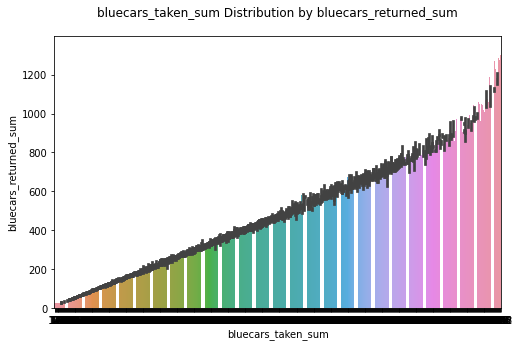

In [46]:
# Plot
BarPlotBiv('bluecars_taken_sum', 'bluecars_returned_sum', autolib3)

**Postal code v bluecars taken**

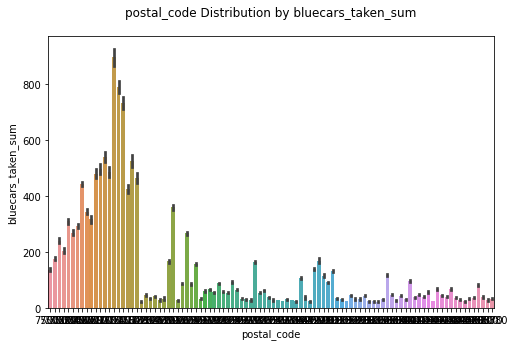

In [47]:
# Plot
BarPlotBiv('postal_code', 'bluecars_taken_sum', autolib3)

**Bluecars returned v postal code**

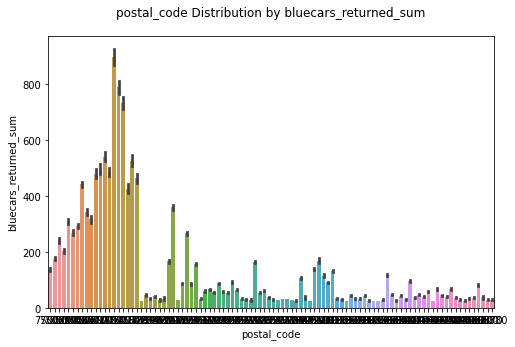

In [48]:
BarPlotBiv('postal_code', 'bluecars_returned_sum', autolib3)

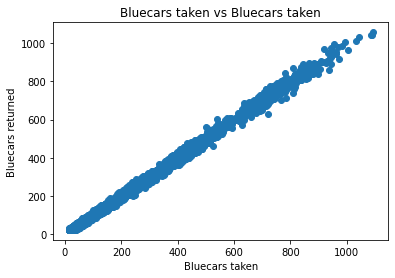

In [49]:
#lets plot a scatter plot
plt.scatter(df2["bluecars_taken_sum"] , df2["bluecars_returned_sum"])

# title
plt.title('Bluecars taken vs Bluecars taken')

# x axis
plt.xlabel('Bluecars taken')

# y axis
plt.ylabel('Bluecars returned')


# viz scatter plot
plt.show()

ii) Numerical-Categorical

# **7.Hypothesis Testing**

Null hypothesis (H0) : The averages of bluecars hired on weekends is equal to the averages of bluecars hired on weekdays
(H0: mu= mu1)

Alternate hypothersis (HA): The averages  of bluecars hired on weeekends is not equal to weekdays) 
(HA: mu!= mu2)

In [50]:
new_autolib = autolib3.reset_index(drop=True)
new_autolib.shape

(11563, 5)

In [52]:
# taking sample
Wknddf = df['bluecars_taken_sum']
Wknddf.head()

0    187
1    180
2    224
3    193
4    217
Name: bluecars_taken_sum, dtype: int64

In [54]:
Wkdaydf = df2['bluecars_taken_sum']
Wkdaydf.head()

0    110
1     98
2    138
3    104
4    114
Name: bluecars_taken_sum, dtype: int64

In [57]:
# weekend sample
WkndS =Wknddf.sample(n=50,replace="False")
WkndS.shape

(50,)

In [58]:
# weekday sample
WkdayS =Wkdaydf.sample(n=50,replace="False")
WkdayS.shape

(50,)

In [60]:
# lets now test our hypothesis, since our sample, n > 30 we will use a z score as our test statistic
from scipy.stats import wilcoxon
# compare samples
stat, p = wilcoxon(WkndS, WkdayS)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('H0: mu= mu1 therefore we fail to reject H0)')
else:
    print('HA: mu!= mu1 therefore we fail to reject HA ')

Statistics=625.500, p=0.908
H0: mu= mu1 therefore we fail to reject H0)
